In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# tensorflow
#%tensorflow_version 1.x
import tensorflow as tf
tf.__version__

'1.13.1'

In [2]:
#from google.colab import drive
#drive.mount('drive/')

In [3]:
#import os
#os.chdir('drive/My Drive/Data-Science-oct-2019/Module-8-Deep Learning/')


In [4]:
#ls

In [5]:
# Loading dataset
df = pd.read_csv('F://numbers1.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Split the data into independent and dependent
X = df.iloc[:,1:].values # independent
y = df.iloc[:,0].values.reshape(-1,1) # dependent
X.shape, y.shape

((42000, 784), (42000, 1))

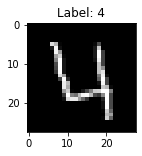

In [7]:
# visualizing one image
def visualize_img(i):
    img = X[i:i+1] # flatten Image
    img = img.reshape(28,28) # reshaped Image
    plt.figure(figsize=(2,2))
    plt.imshow(img,cmap='gray')
    plt.title('Label: {}'.format(y[i][0]))

visualize_img(3)

In [8]:
X.min(),X.max()

(0, 255)

# Normalization

> - Feature scale X
- Apply one hot encoding to y

In [9]:
# normalize X
X_norm = X/X.max() # min max scalling

# onehot enconding of y
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_hot = ohe.fit_transform(y).toarray()
y_hot

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [10]:
# split the data into traning and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_norm,y_hot,test_size=0.2)
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((33600, 784), (8400, 784), (33600, 10), (8400, 10))

# Neural Network

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import regularizers

In [12]:
def neural_network():
    model=Sequential()
    model.add(Dense(units=100,input_shape=(784,),activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))# input connected to output
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

# calling baseline model
neural_network = neural_network()
print(neural_network.summary())
# initializing tensorboard
tfb = TensorBoard('neural_network_mnist')
# Training Model 
history = neural_network.fit(x=x_train,y=y_train,batch_size=30,epochs=20,callbacks=[tfb],validation_data=[x_test,y_test])


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________
None
Train on 33600 samples, validate on 8400 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
33600/33600 [==============================] - 8s 246us/sample - loss: 0.9649 - acc: 0.8856 - val_loss: 0.5726 - val_acc: 0.9177
Epoch 2/20
33600/33600 [==============================] - 8s 249us/sample - loss: 0.5350

In [13]:
# loading into data
data_loss_nn = pd.DataFrame(history.history)
data_loss_nn.head(3)

,loss,acc,val_loss,val_acc
0,0.964928,0.885565,0.572557,0.917738
1,0.534986,0.917857,0.525124,0.913929
2,0.475644,0.928333,0.469855,0.927619


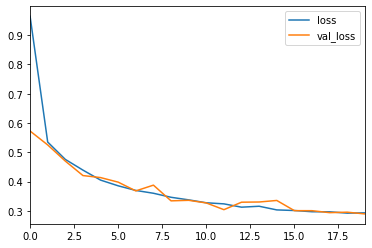

In [14]:
data_loss_nn[['loss','val_loss']].plot(kind='line')

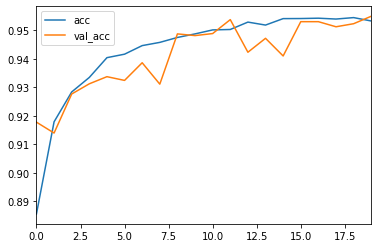

In [15]:
data_loss_nn[['acc','val_acc']].plot(kind='line')

In [16]:
# save the model
neural_network.save('number_minist.h5')

In [17]:
# Evaluation
import innomatics

In [18]:
y_pred = neural_network.predict_classes(x_test)
y_prob = neural_network.predict_proba(x_test)

In [19]:
from sklearn import metrics

In [20]:
y_test_class = ohe.inverse_transform(y_test)

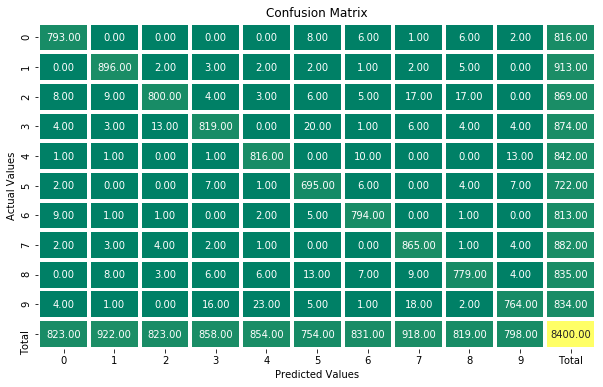

******************************Classifcation Report******************************


              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       816
         1.0       0.97      0.98      0.98       913
         2.0       0.97      0.92      0.95       869
         3.0       0.95      0.94      0.95       874
         4.0       0.96      0.97      0.96       842
         5.0       0.92      0.96      0.94       722
         6.0       0.96      0.98      0.97       813
         7.0       0.94      0.98      0.96       882
         8.0       0.95      0.93      0.94       835
         9.0       0.96      0.92      0.94       834

    accuracy                           0.95      8400
   macro avg       0.95      0.95      0.95      8400
weighted avg       0.96      0.95      0.95      8400


************************************Kappa Score************************************


Kappa Score = 0.9498514848794808

******************************Area Un

ValueError: multiclass format is not supported

In [21]:
innomatics.classification_metric(y_test_class,y_pred,y_prob,label=[0,1,2,3,4,5,6,7,8,9])

In [23]:
# Preictions
import urllib.request
import cv2
from PIL import Image

In [ ]:
pip install PIL

In [24]:
# https://i.postimg.cc/vZNGp1RN/7.jpg
# https://i.postimg.cc/FH6Q86d4/3.jpg
# https://i.postimg.cc/hvVLWNP3/1887.jpg

url_open = urllib.request.urlopen('https://i.postimg.cc/hvVLWNP3/1887.jpg')
obj = Image.open(url_open)
img = np.array(obj) 
img.shape 

(288, 252, 3)

In [25]:
# convert into gray scale
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

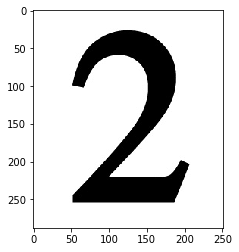

In [26]:
plt.imshow(img,cmap='gray')

In [27]:
def img_norm(img):

    # Image Normalization
    # step-1: not operation
    img_not = cv2.bitwise_not(img)
    # step-2: resize image into 28x28 array
    img_re = cv2.resize(img_not,(28,28)) # compress image
    # step-3: Feature Scaling
    img_norm = img_re/255.0
    # step-3: Flaten you image
    test  = img_norm.reshape(1,-1)

    # visualize the process
    plt.figure(figsize=(10,2))
    plt.subplot(131)
    plt.imshow(img,cmap='gray')
    plt.subplot(132)
    plt.imshow(img_not,cmap='gray')
    plt.subplot(133)
    plt.imshow(img_re,cmap='gray')
    plt.show()
    return test

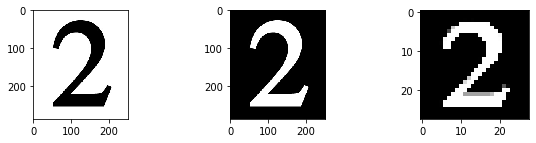

In [29]:
test= img_norm(img)

Neural Network Results:  [2]


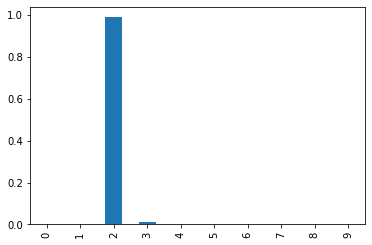

In [30]:
# predicting with model
result = neural_network.predict_classes(test)
print("Neural Network Results: ",result)

# convert int series
pd.Series(neural_network.predict_proba(test).flatten()).plot(kind='bar')
plt.show()

# Convolutional Neural Network

In [31]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten

In [32]:
x_train.shape

(33600, 784)

In [33]:
# Rehape in Traning data (X)
x_train_reshape = x_train.reshape(-1,28,28,1)
x_test_reshape = x_test.reshape(-1,28,28,1)

x_train_reshape.shape,x_test_reshape.shape

((33600, 28, 28, 1), (8400, 28, 28, 1))

In [ ]:
def conv_neural_network():
    model=Sequential()
    # Convolutional layer
    model.add(Conv2D(input_shape=(28,28,1),filters=30,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(Conv2D(filters=60,kernel_size=(5,5),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    model.add(Conv2D(filters=30,kernel_size=(3,3),strides=(1,1),activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    # Flatten
    model.add(Flatten())
    # Neural network
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))# input connected to output
    model.add(Dense(units=100,activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
    model.add(Dense(units=10,activation='softmax'))
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
    return model

# calling baseline model
conv_nn = conv_neural_network()
print(conv_nn.summary())
# initializing tensorboard
tfb = TensorBoard('cnn_mnist')
# Training Model 
history = conv_nn.fit(x=x_train_reshape,y=y_train,batch_size=30,epochs=20,callbacks=[tfb],validation_data=[x_test_reshape,y_test])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 30)        300       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 60)        45060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 30)          16230     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
flatten (Flatten)            (None, 480)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               48100     
__________

In [ ]:
# loading into data
data_loss_nn = pd.DataFrame(history.history)
data_loss_nn.head(3)

In [ ]:
data_loss_nn[['loss','val_loss']].plot(kind='line')

In [ ]:
y_pred = conv_nn.predict_classes(x_test_reshape)
y_prob = conv_nn.predict_proba(x_test_reshape)

In [ ]:
innomatics.classification_metric(y_test_class,y_pred,y_prob,label=[0,1,2,3,4,5,6,7,8,9])

In [ ]:
# https://i.postimg.cc/vZNGp1RN/7.jpg
# https://i.postimg.cc/FH6Q86d4/3.jpg
# https://i.postimg.cc/hvVLWNP3/1887.jpg

url_open = urllib.request.urlopen('https://i.postimg.cc/vZNGp1RN/7.jpg')
obj = Image.open(url_open)
img = np.array(obj) 
img.shape 

In [ ]:
test= img_norm(img)

In [ ]:
# predicting with model
test_re = test.reshape(1,28,28,1)
result = conv_nn.predict_classes(test_re)
print("Neural Network Results: ",result)

# convert int series
pd.Series(conv_nn.predict_proba(test_re).flatten()).plot(kind='bar')
plt.show()

# Good Job !!!



---



---

